In [62]:
# import the required librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# populate a list with years in consideration
years = [ year for year in range(1995, 2024) ]

In [64]:
# we no longer need the data on population
# df_population = pd.read_csv("data/12411-0001_population.csv", index_col=1)
# df_population = df_population["value"]

# # Convert index to datetime so it sorts chronologically
# df_population.index = pd.to_datetime(df_population.index, dayfirst=True)

# # Sort by the date
# df_population = df_population.sort_index()
# df_population = df_population.reset_index()
# df_population["year"] = [ year for year in range(1950, 2025) ]
# df_population = df_population[["year", "value"]]
# df_population = df_population.set_index("year")

# np_popn = np.array( [ df_population.loc[year] for year in years ] ).flatten().astype(float)
# np_popn

In [65]:
# read the data on capital stocks and adjust it in millions of USD
df_capital = pd.read_csv("data/capital_at_constant_prices.csv")
np_capital = np.array(df_capital.loc[45:74, "value"])
np_capital = np_capital / 10**6
np_capital

array([13.908999, 14.22537 , 14.536507, 14.867863, 15.217082, 15.566046,
       15.866557, 16.093383, 16.296018, 16.489087, 16.680977, 16.922098,
       17.172432, 17.415402, 17.556428, 17.741678, 17.9817  , 18.208556,
       18.41593 , 18.647862, 18.885398, 19.145834, 19.417412, 19.707832,
       20.002264, 20.254192, 20.50957 , 20.761662, 20.99792 ])

In [66]:
# ERW061 # no of employees
# ERW063 # total persons in employments: employees + self
# ETG005 # compensation of employees

# read the labor compensation csv
df_labor = pd.read_csv("data/81000-0015_labor_compensation.csv")
df_labor = df_labor[["time", "2_variable_attribute_label", "value_variable_code", "value_variable_label", "value"]]
df_labor = df_labor[ (df_labor["2_variable_attribute_label"] == "Total") ]
df_labor_emp = df_labor[ (df_labor["value_variable_code"] == "ERW061") ]
df_labor_per = df_labor[ (df_labor["value_variable_code"] == "ERW063") ]
df_labor_com = df_labor[ (df_labor["value_variable_code"] == "ETG005") ]

df_labor_emp = df_labor_emp.set_index("time")
df_labor_per = df_labor_per.set_index("time")
df_labor_com = df_labor_com.set_index("time")

In [67]:
# create numpy arrays from the dataframe values
np_labor_emp = np.array([ float(df_labor_emp.loc[year, "value"]) for year in years ])
np_labor_per = np.array([ float(df_labor_per.loc[year, "value"]) for year in years ])
np_labor_com = np.array([ float(df_labor_com.loc[year, "value"]) for year in years ])
np_labor_compensation = np_labor_com * (np_labor_per / np_labor_emp)


In [68]:
# Nominal GDP: load the data from csv
df_ngdp = pd.read_csv("data/ngdp.csv")
df_ngdp = df_ngdp[ df_ngdp["Country Name"] == "Germany" ]
df_ngdp = df_ngdp.T
df_ngdp.head()

,55
Country Name,Germany
Country Code,DEU
Indicator Name,GDP (current LCU)
Indicator Code,NY.GDP.MKTP.CN
1960,181715000000.0


In [69]:
# Real GDP: load the data from csv
df_rgdp = pd.read_csv("data/rgdp.csv")
df_rgdp = df_rgdp[ df_rgdp["Country Name"] == "Germany" ]
df_rgdp = df_rgdp.T
df_rgdp.head()

,55
Country Name,Germany
Country Code,DEU
Indicator Name,GDP (constant LCU)
Indicator Code,NY.GDP.MKTP.KN
1960,898944000000.0


In [70]:
# extract the values for each year and store as a list
ngdp_values = { int(year): df_ngdp.loc[str(year)]/10**9 for year in years }
rgdp_values = { int(year): df_rgdp.loc[str(year)]/10**9 for year in years }

In [71]:
# convert the values from dataframe to numpy array for easier computation
list_ngdp = list(ngdp_values.values())
np_ngdp = np.array(list_ngdp).flatten().astype(float)
print(np_ngdp)

list_rgdp = list(rgdp_values.values())
np_rgdp = np.array(list_rgdp).flatten().astype(float)
print(np_rgdp)

[1899.93 1928.56 1967.18 2022.31 2077.24 2129.66 2195.53 2223.36 2240.81
 2293.04 2325.71 2426.18 2542.22 2589.28 2493.97 2615.26 2746.91 2799.28
 2866.48 2984.47 3087.03 3195.21 3333.11 3434.03 3537.28 3450.72 3682.34
 3989.39 4219.31]
[2560.09 2586.66 2634.62 2689.84 2747.12 2826.14 2872.38 2865.82 2850.64
 2883.77 2909.3  3021.8  3109.1  3136.7  2962.79 3085.29 3201.23 3216.07
 3228.84 3299.23 3354.1  3428.64 3524.57 3564.59 3599.45 3450.72 3585.64
 3650.52 3618.77]


In [72]:
# compute the labor share of gdp
labor_share_of_gdp = np_labor_compensation / np_ngdp
labor_share_of_gdp

array([0.59900316, 0.59658408, 0.58852015, 0.58477627, 0.58478839,
       0.59222696, 0.58383443, 0.58138593, 0.58161099, 0.57261998,
       0.56539052, 0.55250618, 0.54155351, 0.55162668, 0.57602203,
       0.56582294, 0.5611673 , 0.57197533, 0.57432723, 0.57314749,
       0.57521407, 0.57622314, 0.57553738, 0.58387487, 0.5909691 ,
       0.60305572, 0.58414675, 0.5698579 , 0.57598592])

In [73]:
# compute the capital share of gdp
capital_share_of_gdp = 1 - labor_share_of_gdp
capital_share_of_gdp

array([0.40099684, 0.40341592, 0.41147985, 0.41522373, 0.41521161,
       0.40777304, 0.41616557, 0.41861407, 0.41838901, 0.42738002,
       0.43460948, 0.44749382, 0.45844649, 0.44837332, 0.42397797,
       0.43417706, 0.4388327 , 0.42802467, 0.42567277, 0.42685251,
       0.42478593, 0.42377686, 0.42446262, 0.41612513, 0.4090309 ,
       0.39694428, 0.41585325, 0.4301421 , 0.42401408])

([<matplotlib.axis.XTick at 0x1547c2ea0>,
 [Text(1995, 0, '1995'),
  Text(1999, 0, '1999'),
  Text(2003, 0, '2003'),
  Text(2007, 0, '2007'),
  Text(2011, 0, '2011'),
  Text(2015, 0, '2015'),
  Text(2019, 0, '2019'),
  Text(2023, 0, '2023')])

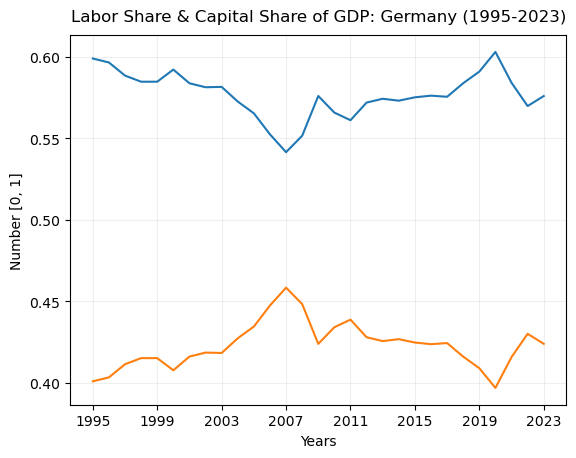

In [74]:
# plot the labor share and capital share in the chart
plt.plot(years, labor_share_of_gdp, label="Labor Share")
plt.plot(years, capital_share_of_gdp, label="Capital Share")
plt.title("Labor Share & Capital Share of GDP: Germany (1995-2023)", pad=10)
plt.xlabel(xlabel="Years")
plt.ylabel(ylabel="Number [0, 1]")
plt.grid(alpha=0.2)
plt.xticks(years[::4])

In [75]:
# growth in real gdp
gy = (np.diff(np_rgdp) / np_rgdp[:-1])
gy

array([ 0.01037854,  0.01854128,  0.02095938,  0.02129495,  0.02876467,
        0.01636154, -0.00228382, -0.00529691,  0.01162195,  0.00885299,
        0.0386691 ,  0.02889007,  0.00887717, -0.05544362,  0.04134616,
        0.03757832,  0.00463572,  0.00397068,  0.0218004 ,  0.01663115,
        0.02222355,  0.02797902,  0.01135458,  0.00977953, -0.0413202 ,
        0.03909909,  0.0180944 , -0.00869739])

In [76]:
# growth in capital stock
gk = (np.diff(np_capital) / np_capital[:-1])
gk

array([0.02274578, 0.02187198, 0.02279475, 0.02348818, 0.02293239,
       0.01930554, 0.01429586, 0.0125912 , 0.01184762, 0.01163739,
       0.01445485, 0.01479332, 0.01414884, 0.00809777, 0.01055169,
       0.01352871, 0.01261594, 0.01138882, 0.0125941 , 0.01273798,
       0.01379034, 0.0141847 , 0.01495668, 0.01493985, 0.01259497,
       0.01260865, 0.01229143, 0.01137953])

In [77]:
# change in labor compensation
emp_change = (np.diff(np_labor_compensation) / np_labor_compensation[:-1])
emp_change

array([ 0.01096961,  0.00623779,  0.02148509,  0.0271833 ,  0.03827652,
        0.01632036,  0.00842877,  0.00823863,  0.00748941,  0.00144235,
        0.01942687,  0.02705652,  0.03745621,  0.00578705,  0.03006612,
        0.04169689,  0.03869215,  0.02821679,  0.0390233 ,  0.03809413,
        0.03685912,  0.04191688,  0.04520309,  0.04258231, -0.00451907,
        0.03366234,  0.05688375,  0.06900623])

In [78]:
# change in hours worked
gn = (np.diff(np_labor_per) / np_labor_per[:-1])
gn

array([ 0.00042054, -0.00044664,  0.01195952,  0.01623377,  0.0217508 ,
       -0.00277667, -0.00479117, -0.01078792,  0.00315956, -0.0012192 ,
        0.00727328,  0.01699152,  0.01415059,  0.00127292,  0.00479182,
        0.01146013,  0.01190763,  0.00744087,  0.00891972,  0.00891103,
        0.01272689,  0.01382594,  0.01327613,  0.00920273, -0.00717582,
        0.00166793,  0.01305477,  0.00670626])

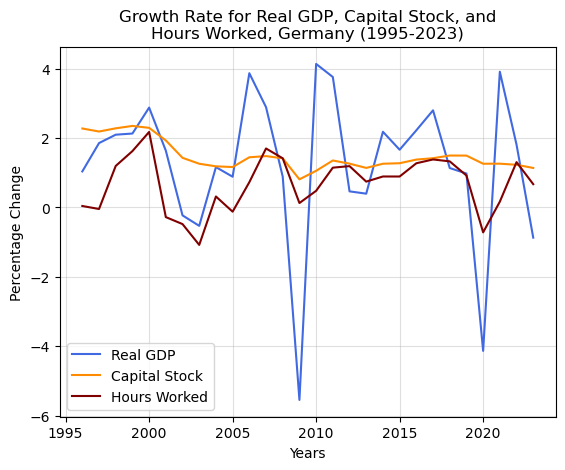

In [79]:
plt.plot(years[1:], gy * 100, color="royalblue", label="Real GDP")
plt.plot(years[1:], gk * 100, color="darkorange", label="Capital Stock")
plt.plot(years[1:], gn * 100, color="maroon", label="Hours Worked")
plt.legend()
plt.title("Growth Rate for Real GDP, Capital Stock, and\nHours Worked, Germany (1995-2023)")
plt.xlabel(xlabel="Years")
plt.ylabel(ylabel="Percentage Change")
plt.grid(alpha=0.4)

In [80]:
# change in total factor productivity
ga = ( gy - capital_share_of_gdp[1:] * gk - labor_share_of_gdp[1:] * gn )
ga

array([ 0.00095164,  0.00980426,  0.00450081,  0.00204907,  0.00653205,
        0.00994835, -0.00548275, -0.00429056,  0.00474929,  0.0044846 ,
        0.02818211,  0.0129063 , -0.00527264, -0.05961013,  0.03405354,
        0.02521042, -0.00757508, -0.00515072,  0.01131226,  0.00609449,
        0.00904599,  0.0140008 , -0.00262087, -0.00176986, -0.04199229,
        0.03288142,  0.00536797, -0.01738519])

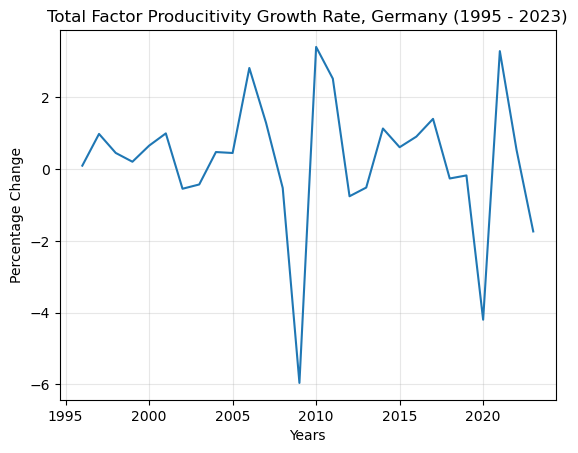

In [81]:
plt.plot(years[1:], ga * 100)
plt.xlabel(xlabel="Years")
plt.ylabel(ylabel="Percentage Change")
plt.title("Total Factor Producitivity Growth Rate, Germany (1995 - 2023)")
plt.grid(alpha=0.3)

Text(0, 0.5, 'Percentage')

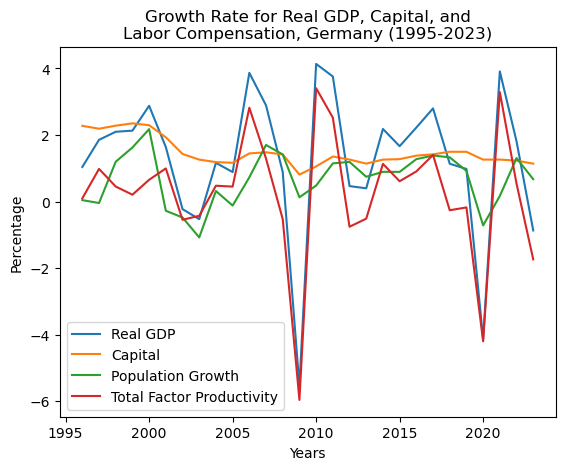

In [82]:
plt.plot(years[1:], gy * 100, label="Real GDP")
plt.plot(years[1:], gk * 100, label="Capital")
plt.plot(years[1:], gn * 100, label="Population Growth")
plt.plot(years[1:], ga * 100, label="Total Factor Productivity")
plt.legend()
plt.title("Growth Rate for Real GDP, Capital, and\nLabor Compensation, Germany (1995-2023)")
plt.xlabel(xlabel="Years")
plt.ylabel(ylabel="Percentage")

In [83]:
gy.min()*100, gy.max()*100, gy.mean()*100

(-5.544361909012652, 4.134616358229912, 1.2666510105118944)

In [84]:
gn.mean() * 100, gn.min()*100, gn.max()*100

(0.6782390556366645, -1.0787921560719866, 2.175079872204473)

In [85]:
gk.mean() * 100, gk.min() * 100, gk.max() * 100

(1.4827458897401395, 0.8097774602044793, 2.3488177150946288)

In [86]:
labor_share_of_gdp.mean(), labor_share_of_gdp.min(), labor_share_of_gdp.max(), labor_share_of_gdp.std()

(0.5770260134432758,
 0.5415535085495585,
 0.6030557170036757,
 0.013832587117418802)

In [87]:
capital_share_of_gdp.mean(), capital_share_of_gdp.std(), capital_share_of_gdp.min(), capital_share_of_gdp.max()

(0.4229739865567241,
 0.0138325871174188,
 0.39694428299632434,
 0.4584464914504415)

In [88]:
emp_change.mean() * 100, emp_change.min() * 100, emp_change.max() *100

(2.761366095097498, -0.45190708906010774, 6.900622667062918)

In [89]:
ga.mean() * 100, ga.std() * 100, ga.min() * 100, ga.max() * 100

(0.2533046679121856, 1.9108953036917529, -5.961012631388146, 3.405353721329246)